In [39]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [40]:
train = ImageDataGenerator(rescale=1.0/255)
test = ImageDataGenerator(rescale=1.0/255)

# Load training dataset
train_dataset = train.flow_from_directory(
    r"/content/drive/MyDrive/Training and Validation",  # Use raw string for path
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load testing dataset
test_dataset = test.flow_from_directory(
    r"/content/drive/MyDrive/Testing",  # Use raw string for path
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1832 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [41]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [42]:


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
r = model.fit(train_dataset, epochs=12, validation_data=test_dataset)

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.8072 - loss: 0.3973 - val_accuracy: 0.9091 - val_loss: 0.4262
Epoch 2/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9408 - loss: 0.1696 - val_accuracy: 0.8788 - val_loss: 0.2615
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9513 - loss: 0.1537 - val_accuracy: 0.8788 - val_loss: 0.2891
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9528 - loss: 0.1481 - val_accuracy: 0.9394 - val_loss: 0.1827
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9625 - loss: 0.1082 - val_accuracy: 0.8788 - val_loss: 0.8751
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9646 - loss: 0.1470 - val_accuracy: 0.9394 - val_loss: 0.2065
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9767 - loss: 0.0747 - val_accuracy: 0.7273 - val_loss: 1.1609
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9684 - loss: 0.1041 - val_accuracy: 0.9394 - val_loss: 0.

In [45]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions).flatten()

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


In [46]:
predictions

array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.],
      dtype=float32)

In [47]:
print(len(predictions))

33


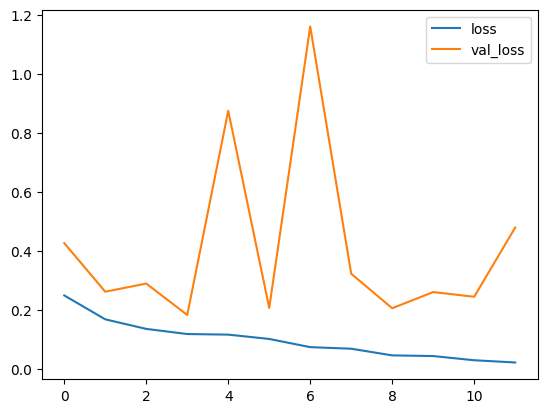

In [48]:
# It's time to plot it! Let's plot loss.

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


In [49]:
# This helps in taking individual images from the Dataset and predicting.
def predictImage(filename):
    img1 = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img1)

    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis=0)

    val = model.predict(X)
    print(val)

    if val == 1:
        plt.xlabel("No Fire", fontsize=30)
    elif val == 0:
        plt.xlabel("Fire", fontsize=30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.]]


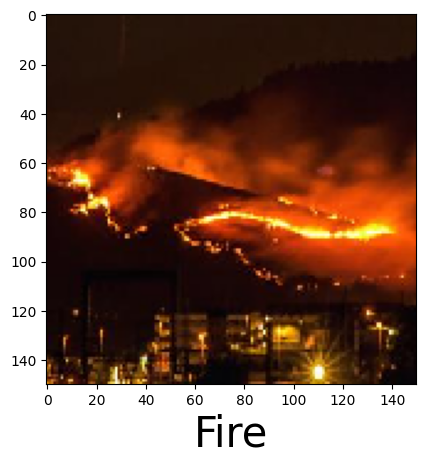

In [51]:
predictImage("/content/drive/MyDrive/Testing/fire/abc182.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.]]


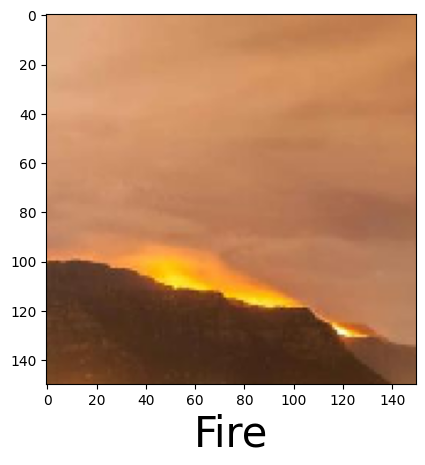

In [52]:
predictImage("/content/drive/MyDrive/Testing/fire/abc185.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.]]


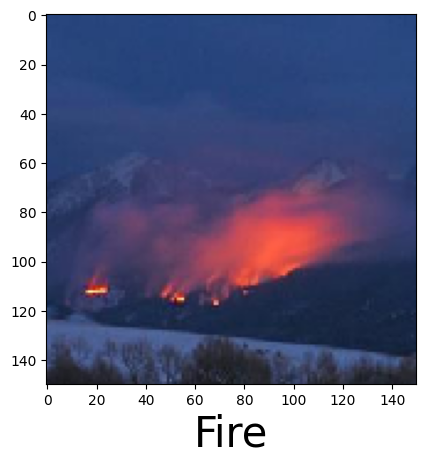

In [53]:
predictImage("/content/drive/MyDrive/Testing/fire/abc180.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.]]


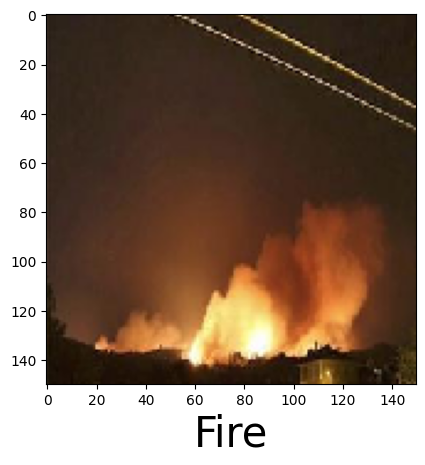

In [54]:
predictImage("/content/drive/MyDrive/Testing/fire/abc190.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.]]


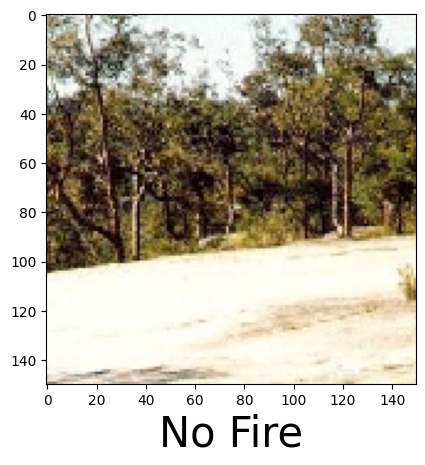

In [55]:
predictImage("/content/drive/MyDrive/Testing/nofire/abc361.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[1.]]


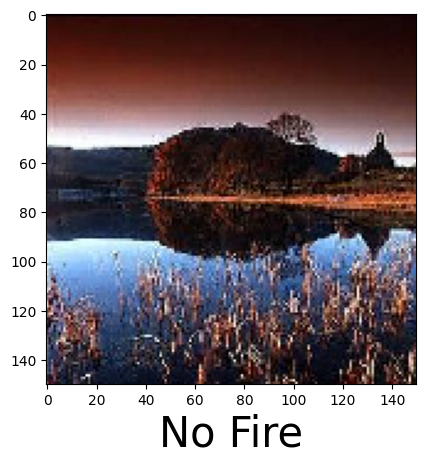

In [57]:
predictImage("/content/drive/MyDrive/Testing/nofire/abc367.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[1.]]


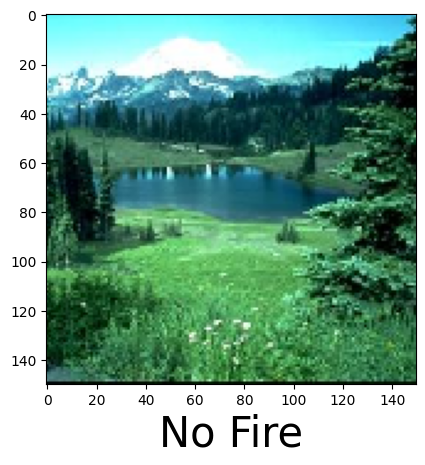

In [58]:
predictImage("/content/drive/MyDrive/Testing/nofire/abc377.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[1.]]


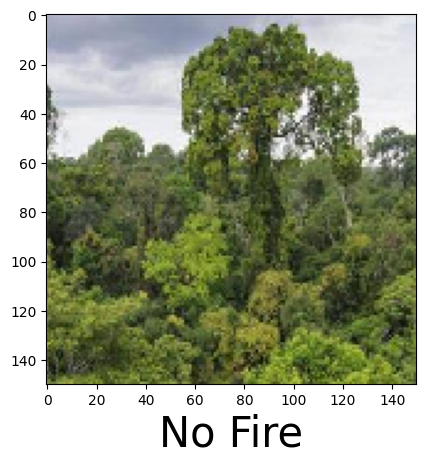

In [59]:
predictImage("/content/drive/MyDrive/Testing/nofire/abc380.jpg")